In [19]:
import numpy as np
import pandas as pd 
import tensorflow as tf
from tensorflow.keras.preprocessing.image import load_img, ImageDataGenerator
from tensorflow.keras.callbacks import ReduceLROnPlateau
from tensorflow.keras import layers
from sklearn.model_selection import train_test_split
from skimage import io, transform
import matplotlib.pyplot as plt
import random
import os
from PIL import Image, ImageOps

In [2]:
batch_size = 32
img_height = 200
img_width = 200
data_dir = 'dataset/'

In [3]:
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 1238 files belonging to 2 classes.
Using 991 files for training.


In [4]:
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 1238 files belonging to 2 classes.
Using 247 files for validation.


In [5]:
class_names = train_ds.class_names
print(class_names)

['with_mask', 'without_mask']


0 - with mask, 1 - without_mask

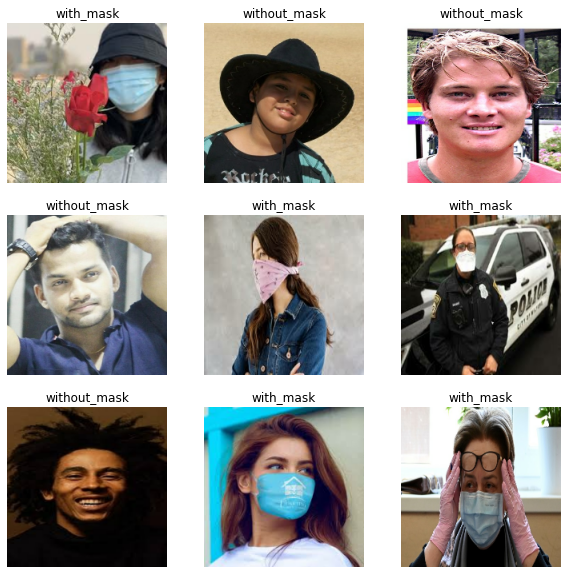

In [6]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(class_names[labels[i]])
        plt.axis("off")

In [7]:
for image_batch, labels_batch in train_ds:
    print(image_batch.shape)
    print(labels_batch.shape)
    break

(32, 200, 200, 3)
(32,)


In [8]:
AUTOTUNE = tf.data.experimental.AUTOTUNE

train_ds = train_ds.cache().prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

In [41]:
num_classes = 2

model = tf.keras.Sequential([
  layers.experimental.preprocessing.Rescaling(1./255),
  layers.Conv2D(64, 3, activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(128, 3, activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(256, 3, activation='relu'),
  layers.MaxPooling2D(),
  #layers.Conv2D(512, 3, activation='relu'),
  #layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(256, activation='relu'),
  layers.Dense(1, activation = 'sigmoid')
])

In [42]:
#model.compile(
#  optimizer='adam',
#  loss=tf.losses.SparseCategoricalCrossentropy(from_logits=True),
#  metrics=['accuracy'])

In [43]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [15]:
#model.compile(loss='SparseCategoricalCrossentropy', optimizer='adam', metrics=['acc'])

In [61]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
rescaling_4 (Rescaling)      (None, 200, 200, 3)       0         
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 198, 198, 64)      1792      
_________________________________________________________________
max_pooling2d_13 (MaxPooling (None, 99, 99, 64)        0         
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 97, 97, 128)       73856     
_________________________________________________________________
max_pooling2d_14 (MaxPooling (None, 48, 48, 128)       0         
_________________________________________________________________
conv2d_15 (Conv2D)           (None, 46, 46, 256)       295168    
_________________________________________________________________
max_pooling2d_15 (MaxPooling (None, 23, 23, 256)      

In [44]:
model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=5
)

Epoch 1/5
31/31 [==============================] - 172s 6s/step - loss: 0.9882 - accuracy: 0.6650 - val_loss: 0.5561 - val_accuracy: 0.7206
Epoch 2/5
31/31 [==============================] - 173s 6s/step - loss: 0.5147 - accuracy: 0.7568 - val_loss: 0.5361 - val_accuracy: 0.7611
Epoch 3/5
31/31 [==============================] - 174s 6s/step - loss: 0.4545 - accuracy: 0.8032 - val_loss: 0.3995 - val_accuracy: 0.8421
Epoch 4/5
31/31 [==============================] - 177s 6s/step - loss: 0.3768 - accuracy: 0.8295 - val_loss: 0.4439 - val_accuracy: 0.7895
Epoch 5/5
31/31 [==============================] - 176s 6s/step - loss: 0.3442 - accuracy: 0.8527 - val_loss: 0.3832 - val_accuracy: 0.8543


In [45]:
im = Image.open('Data_Problem_6_Sai_Thatigotla.jpg')
#im = ImageOps.grayscale(im)
imResize = im.resize((200,200), Image.ANTIALIAS)

In [46]:
imResize = imResize.rotate(90)

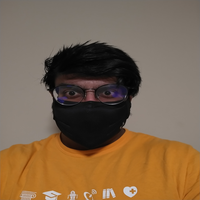

In [47]:
imResize

In [48]:
image_array = tf.keras.preprocessing.image.img_to_array(imResize)

In [49]:
image_array.shape

(200, 200, 3)

In [50]:
image_array = image_array.reshape(-1, 200, 200, 3)

0 - with mask, 1 - without_mask

In [51]:
model.predict(image_array)

array([[0.08124608]], dtype=float32)

In [54]:
im2 = Image.open('Data_Problem_1_Sai_Thatigotla.jpg')
#im = ImageOps.grayscale(im)
imResize2 = im2.resize((200,200), Image.ANTIALIAS)

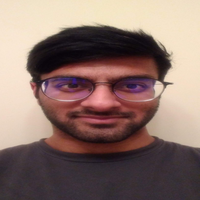

In [55]:
imResize2

In [56]:
image_array2 = tf.keras.preprocessing.image.img_to_array(imResize2)
image_array2 = image_array2.reshape(-1, 200, 200, 3)

In [57]:
model.predict(image_array2)

array([[0.8364424]], dtype=float32)

In [60]:
b1, b2 in train_ds[0]

NameError: name 'b1' is not defined